In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.metrics import average_precision_score , roc_auc_score
from sklearn import metrics
from skopt import forest_minimize

from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Carregando os dados
df = pd.read_csv('train.csv').drop(['id','Vintage','Annual_Premium'],axis=1)
y_data = df['Response'].values


df = df.drop('Response',axis=1)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
0,Male,44,1,28.0,0,> 2 Years,Yes,26.0
1,Male,76,1,3.0,0,1-2 Year,No,26.0
2,Male,47,1,28.0,0,> 2 Years,Yes,26.0


In [16]:
# Transformando as variaveis categoricas para numericas
lb1 = LabelEncoder()
df['Gender']= lb1.fit_transform(df['Gender'])

lb2 = LabelEncoder()
df['Vehicle_Age']= lb2.fit_transform(df['Vehicle_Age'])

lb3 = LabelEncoder()
df['Vehicle_Damage']= lb3.fit_transform(df['Vehicle_Damage'])

In [17]:
# Divindo os dados entre treino e teste
x_train,x_test,y_train,y_test = train_test_split(df,
                                                y_data,test_size=0.3,
                                                random_state=0)

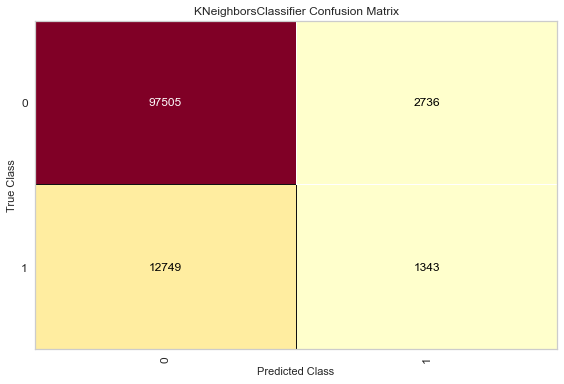

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
# Construindo o modelo com uma estimativa inicial de k = 2
knn = ConfusionMatrix(KNeighborsClassifier(n_neighbors = 2))
knn = knn.fit(x_train,y_train)
knn.score(x_test, y_test)
knn.poof()

In [23]:
predicts = knn.predict(x_test)

print('KNearest Neighbors ')
print(metrics.classification_report(y_test, predicts))

p = knn.predict_proba(x_test)[:,1]
print(f'AUC: {roc_auc_score(y_test,p)} \nAVG: {average_precision_score(y_test,p)} ')

KNearest Neighbors 
              precision    recall  f1-score   support

           0       0.88      0.97      0.93    100241
           1       0.33      0.10      0.15     14092

    accuracy                           0.86    114333
   macro avg       0.61      0.53      0.54    114333
weighted avg       0.82      0.86      0.83    114333

AUC: 0.657243352277752 
AVG: 0.204763205514309 
